# <center> Data Analytics Case: School Attendance metrics<center>

**Project:**
Data Analytics Case Study

**Author:**
Heber Mauro Ttito Chara

**Last modification:**
2023.01.14


<hr style="height:2px;border-width:0;color:black;background-color:black">

## 0. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data cleaning

In [2]:
#Import data
df_attendance=pd.read_excel('Case_Study_-_Student_Absence_-_2022-2023_-_Oct_-_Nov.xlsx', index_col=None)
df_enrollment=pd.read_excel('Case_Study_-_Student_Enrollment.xlsx', index_col=None, usecols="B:C")

In [3]:
df_attendance.head()

,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
0,83W2407401136T,Reyon,Angola,14-09-2022,NaN,Civics - 11G,NaN,Grade 11-G - Thurston & Wright,Grade 11,Male
1,83W2407401136T,Reyon,Angola,22-09-2022,NaN,English Language- Gibson/K. Cooper,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
2,83W2407401136T,Reyon,Angola,04-10-2022,Period 1 (Morning),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
3,83W2407401136T,Reyon,Angola,04-10-2022,Period 2 (Afternoon),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
4,83W2407401136T,Reyon,Angola,04-10-2022,NaN,Mathematics- Daniels,Absence - Excused,Grade 11-G - Thurston & Wright,Grade 11,Male


In [4]:
df_enrollment.head()

,Enrollment,Unnamed: 2
0,Jamaica,887
1,Malaui,135
2,Mauricio,483
3,Guinea,1230
4,Yemen,53


In [5]:
#Rename columns
df_enrollment.rename(columns={'Enrollment': 'Institution', 'Unnamed: 2': 'Enrollment'}, inplace=True)

In [6]:
#Checking variables and null values
df_attendance.info()
df_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173106 entries, 0 to 173105
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Student ID          173106 non-null  object
 1   Student             173106 non-null  object
 2   Institution         173052 non-null  object
 3   Date                173106 non-null  object
 4   Attendance Per Day  65155 non-null   object
 5   Subjects            97415 non-null   object
 6   Absence Type        136352 non-null  object
 7   Institution Class   173027 non-null  object
 8   Education Grade     173106 non-null  object
 9   Gender              173106 non-null  object
dtypes: object(10)
memory usage: 13.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Institution  54 non-null     object
 1   Enrollment   54 non-null     

The variables Institution, Data, Attendance Per Day, Subjects, Absence Type, and Institution Class have nulls values.

It is noted that the date variable must be in date format and not in object format.

In [7]:
# Change the format of 'Date' column
df_attendance['Date']= pd.to_datetime(df_attendance['Date'])
print(df_attendance['Date'].dtypes)


datetime64[ns]


### Variables analysis

**The spreadsheets did not came with a dictionary.** 

The variables will be analyzed in order to understand each one and their relationship with each other.

**Recommendation**: The Ministry of Education should provide dictionaries of the databases because our interpretation could be inaccurate.  

#### Analyzing the enrollment

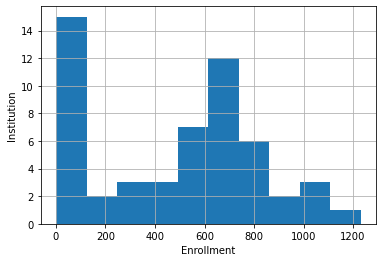

In [8]:
# Analyzing the enrollment
df_enrollment['Enrollment'].hist(bins=10) 
plt.xlabel("Enrollment")
plt.ylabel("Institution")
plt.rcParams['figure.figsize'] = [5,5] 
plt.show()

In [9]:
# Analyzing some statistics of enrollment
df_enrollment.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Enrollment,54.00,481.61,346.94,1.00,70.75,539.00,722.75,1230.00


In [10]:
# A categorical variable is created to deepen the analysis of attendance.
df_enrollment['School_size'] = pd.cut(x=df_enrollment['Enrollment'], bins=[0, 500, 1230], 
                                labels=['small institution','non-small institution'])

In [11]:
df_enrollment.head()

,Institution,Enrollment,School_size
0,Jamaica,887,non-small institution
1,Malaui,135,small institution
2,Mauricio,483,small institution
3,Guinea,1230,non-small institution
4,Yemen,53,small institution


The enrollment database needs to have cut-off date information. If the data needs to be updated, more or fewer students could be enrolled since enrollment is not constant. Outdated information could affect the estimation of attendance rates.

**Recommendation**: Include the information's cut-off date, which should be close to the attendance information.

#### Analyzing the attendance

In [12]:
#Summary of attendance variables
df_attendance.describe()

<ipython-input-12-6aa1d84b4e8d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_attendance.describe()


,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
count,173106,173106,173052,173106,65155,97415,136352,173027,173106,173106
unique,38665,21359,146,85,2,3949,3,1134,28,2
top,83W1601496548T,Shaon,Senegal,2022-08-29 00:00:00,Period 1 (Morning),Grammar and Usage,Absence - Unexcused,Grade 7-A,Grade 8,Male
freq,16,411,8112,11639,33092,3177,102647,2193,22355,87188
first,NaN,NaN,NaN,2022-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


**Review of a "Student ID" having only one name ("Student")**

In [13]:
# Analyzing some statistics of cases by unique id - name
group = pd.DataFrame({'cases' : df_attendance.groupby( [ 'Student ID','Student'] ).size()}).reset_index()

group2 = pd.DataFrame({'cases' : group.groupby( [ 'Student ID'] ).size()}).reset_index()
group2.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
cases,38665.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


It is verified that a "Student ID" has a unique corresponding "Student" name in the provided data.

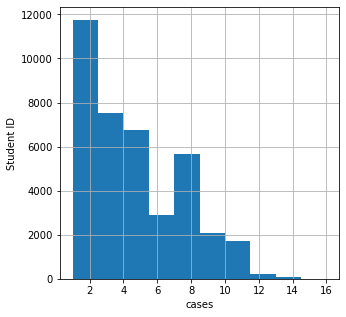

In [14]:
# Review the number of cases
group['cases'].hist(bins=10) 
plt.xlabel("cases")
plt.ylabel("Student ID")
plt.rcParams['figure.figsize'] = [5,5] 
plt.show()

Contrary to expectations, all students do not have a similar number of attendance reports. It is suspected that the information provided only corresponds to a subset of students with at least one non-attendance and needs to be completed.

**Review of "Institution"**

In [15]:
df_attendance['Institution'].value_counts()

Senegal           8112
Guinea            6884
Jamaica           6710
Níger             6422
Argelia           6280
                  ... 
Turquía             16
Uzbekistán          14
Azerbaiyán          10
Timor Oriental      10
Bulgaria             8
Name: Institution, Length: 146, dtype: int64

"Institution" appears in both bases. It identifies a unique institution and will be used as a key variable for the join.

**Review of "Date"**

In [16]:
#First and last day
display(df_attendance.Date.min())
display(df_attendance.Date.max())

Timestamp('2022-01-09 00:00:00')

Timestamp('2023-02-01 00:00:00')

In [17]:
df_attendance['Date'].value_counts()

2022-08-29    11639
2022-09-28     5965
2022-09-22     5573
2022-05-09     5515
2022-08-30     4640
              ...  
2022-12-14        1
2022-12-21        1
2022-12-28        1
2022-12-15        1
2022-09-12        1
Name: Date, Length: 85, dtype: int64

It is observed that attendance records are from January 09, 2022, to February 01, 2023. However, the exercise asks for analyzing the last three months, from September to November. These are probably registration errors.

In [18]:
#Extracting the month for later use
df_attendance['Month']=pd.DatetimeIndex(df_attendance['Date']).month
df_attendance['Year']=pd.DatetimeIndex(df_attendance['Date']).year

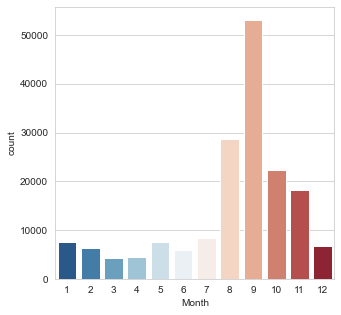

In [19]:
# Analyzing absence type
sns.set_style('whitegrid')
ax=sns.countplot(x='Month',data=df_attendance,palette='RdBu_r')

Suspicions of recording errors increased since there were very few records between December and July.

In [20]:
# Filtering the months of analysis
tam1 = df_attendance.shape
df_attendance=df_attendance[(df_attendance['Month']>=9)&(df_attendance['Month']<=11)].reset_index()
del df_attendance['index']
tam2=df_attendance.shape

print("The number of recorded attendance records decreased from ", tam1[0]," to ", tam2[0],".")


The number of recorded attendance records decreased from  173106  to  93714 .


**Review of "Attendance per day", "Absence Type" and their relation**

In [21]:
#Values of Attendance per day
df_attendance['Attendance Per Day'].value_counts()

Period 1 (Morning)      15658
Period 2 (Afternoon)    15485
Name: Attendance Per Day, dtype: int64

In [22]:
#Values of Absence Type
df_attendance['Absence Type'].value_counts()

Absence - Unexcused    55611
Absence - Excused      18812
Late                    1571
Name: Absence Type, dtype: int64

In [23]:
df_attendance.groupby(['Attendance Per Day', 'Absence Type'], dropna=False).size().unstack('Absence Type')

Absence Type,Absence - Excused,Absence - Unexcused,Late,NaN
Attendance Per Day,,,,
Period 1 (Morning),5722,8321,439,1176
Period 2 (Afternoon),5645,8165,159,1516
NaN,7445,39125,973,15028


No relationship between the variables Attendance Per Day and Absence Type was identified. 

The variable Attendance Per Day has too many missing values (60% +); therefore, it is recommended to refrain from using it in this analysis. 

In [24]:
df_attendance.groupby(['Absence Type'], dropna=False).size()

Absence Type
Absence - Excused      18812
Absence - Unexcused    55611
Late                    1571
NaN                    17720
dtype: int64

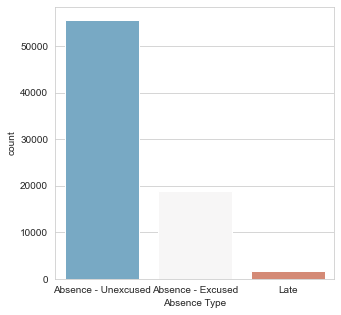

In [25]:
# Analyzing absence type
sns.set_style('whitegrid')
ax=sns.countplot(x='Absence Type',data=df_attendance,palette='RdBu_r')

**Assumption:** late, and NaN were considered as presence.

In [26]:
#New attendance variable
df_attendance['Attendance'] = 0
df_attendance.loc[df_attendance['Absence Type']=='Absence - Excused', 'Attendance'] = 0
df_attendance.loc[df_attendance['Absence Type']=='Absence - Unexcused', 'Attendance'] = 0
df_attendance.loc[df_attendance['Absence Type']=='Late', 'Attendance'] = 1
df_attendance.loc[pd.isna(df_attendance['Absence Type']), 'Attendance'] = 1

In [27]:
df_attendance.groupby(['Attendance'], dropna=False).size()

Attendance
0    74423
1    19291
dtype: int64

**Review of "Subjects" and "Institution Class"**

In [28]:
df_attendance['Subjects'].value_counts()

Physical Education                            1632
Grammar and Usage                             1482
English Language                              1469
Spanish                                       1354
Computer Studies                              1055
                                              ... 
Physical Education - 10L                         1
Computer Studies Option B 7L-O D Major           1
Physical Education - Grade 5 Outten              1
9A1 - H1 - English Language - M. Pennerman       1
History-12J-V. Sears-Nelson                      1
Name: Subjects, Length: 3722, dtype: int64

In [29]:
df_attendance['Institution Class'].value_counts()

Grade 7-A                     1165
Grade 11-A                    1137
Grade 8-A                     1116
Grade 10-A                    1017
Grade 9-A                      934
                              ... 
Junior Prevocational 9-A         1
Junior Special Trainable-A       1
K4- Rolle                        1
Grade 1 Special                  1
Grade 6-Test Class               1
Name: Institution Class, Length: 1117, dtype: int64

The variables "Subjects" and "Institution Class" have too many different unique values to be grouped according to some logic.

**Recommendation:** The variable "Subjects" should be standardized according to the country's curriculum. There are course names that are very similar but different from each other.

**Review of "Education Grade"**

<AxesSubplot:xlabel='count', ylabel='Education Grade'>

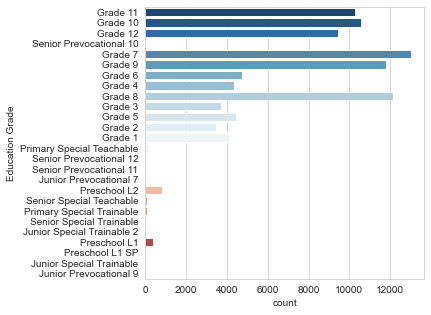

In [30]:
# Education Grade
sns.set_style('whitegrid')
sns.countplot(y='Education Grade',data=df_attendance,palette='RdBu_r')

In [31]:
#Values of Education Grade
df_attendance['Education Grade'].value_counts()

Grade 7                       13034
Grade 8                       12161
Grade 9                       11798
Grade 10                      10576
Grade 11                      10289
Grade 12                       9460
Grade 6                        4738
Grade 5                        4445
Grade 4                        4356
Grade 1                        4110
Grade 3                        3683
Grade 2                        3477
Preschool L2                    789
Preschool L1                    377
Primary Special Teachable       195
Primary Special Trainable        60
Senior Special Teachable         59
Senior Special Trainable         47
Senior Prevocational 11          22
Senior Prevocational 10          11
Junior Prevocational 7           10
Preschool L1 SP                   8
Senior Prevocational 12           6
Junior Special Trainable 2        1
Junior Special Trainable          1
Junior Prevocational 9            1
Name: Education Grade, dtype: int64

Reviewing information from (1) the [Bahamas government website](https://www.bahamas.gov.bs/wps/portal/public/gov/government/contacts/agencies/government%20departments/department%20of%20education/!ut/p/b1/vZTJbqNAEIafZR7AodnhyNosBmxo1osFxgtgDAo7Tz925hKNlMxoNEnXqaW_6qv_PxSWYBGW3NOxuKR90dzT2_OfMAcSQEsQKM6CNGCA7u-2wo7VCE6lsRCL3BjMcmNNshKOVePPUo2b8QnMsQIdNhf9SkEXfpxwppcNliT5LTsaKCluS-_YKBsCB-6M6Van9nDPrWUUh7ZZxdaVsxO0iiQMuV6DbY3LEYSRskaHYrm71ha4hhF1vHoO7DN0by1_1cvTIh-oTQ73471s2YIlyItGgNmeRcmRxjiSM05rOSEPCkuffjzMxQ9z4IMngD95_9X_gcCh_rL_3_khlnwmedvgTfAZ4tMJJoHFDwH7ToACAHQcCK6H7wHn0hjCIkAdvHJp9bVa3RJMOCp1oltFGyAfoFILbL9abT6xkZzsAMANhAIbKa1py4nZ9fIuD1xfFKSh9CXld6BDIP4BlHDG9GngQeKrgZB2uEcELNoJNAGA9O1A_KuA0LH20jNSJD4jJTVNYLYkB6jvBjL_HWhgSZHVL9OxfgEvBA9oDudIhmABR9BYUMbULHf624UChV_mYUzkF2o_FAKZ573uucvt2m37owt10dvXO5LnzwifjkarLj0dx3yOZ75zDruDQaiDeUKQCETG0gJxzzahxSeL2lUyeTUGwVqz-aSxt_mS8nZieXN_7azo1dWTqdkA0VTwDV5lKJdVb1qaND3TDJypFBbgaNwd5TAnEdMeZx_P1EmN50dewIqq47zNheCmVRHXlReyYC_j6yBsNr73yp1lgSJRBB4Xzdaa-oS19WiaW8bV1uhdnYSfJq7tDA!!/dl4/d5/L2dBISEvZ0FBIS9nQSEh/#:~:text=Education%20and%20Technical%20and%20Vocational%20Training%2C%20Ministry%20of&text=The%20primary%20level%20covers%20grades,(grades%2010%20-%2012)) and (2) a [UNESCO report on education in the Bahamas](http://www.ibe.unesco.org/fileadmin/user_upload/Inclusive_Education/Reports/kingston_07/bahamas_inclusion_07.pdf), a grade grouping variable can be created by levels. 

**From (1) Department of Education:**

> *Schools are categorized as follows:* 

> *Pre-School 4 to 5 years*

> *Primary 5 to 11+ years*

> *Junior High 11+ to 14+ years*

> *Senior High 14+ to 16+ years*

> *All - Age 5+ to 16+ years*

> *Special Schools All ages, catering to students having severe learning disabilities*

**From (2) UNESCO report:**

![Imagen](educ_system.png)



In [32]:
# New variable Education level
df_attendance['Education level']=df_attendance['Education Grade']

df_attendance.loc[df_attendance['Education Grade']=='Preschool L1', 'Education level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L1 SP', 'Education level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L2', 'Education level'] = "Pre-school"
df_attendance.loc[df_attendance['Education Grade']=='Preschool L2 SP', 'Education level'] = "Pre-school"

df_attendance.loc[df_attendance['Education Grade']=='Grade 1', 'Education level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 2', 'Education level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 3', 'Education level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 4', 'Education level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 5', 'Education level'] = "Primary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 6', 'Education level'] = "Primary"

df_attendance.loc[df_attendance['Education Grade']=='Grade 7', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 8', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 9', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 10', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 11', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Grade 12', 'Education level'] = "Secondary"

df_attendance.loc[df_attendance['Education Grade']=='Primary Special Teachable', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Primary Special Trainable', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Senior Special Teachable', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Senior Special Trainable', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Level I', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Trainable', 'Education level'] = "Special"
df_attendance.loc[df_attendance['Education Grade']=='Junior Special Trainable 2', 'Education level'] = "Special"

df_attendance.loc[df_attendance['Education Grade']=='Junior Prevocational 7', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Junior Prevocational 9', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 10', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 11', 'Education level'] = "Secondary"
df_attendance.loc[df_attendance['Education Grade']=='Senior Prevocational 12', 'Education level'] = "Secondary"


<AxesSubplot:xlabel='count', ylabel='Education level'>

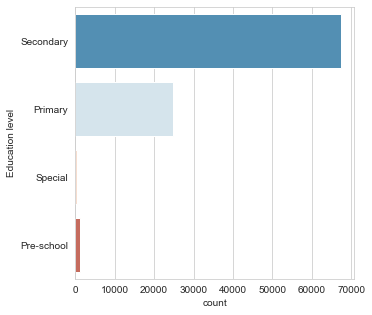

In [33]:
# Graph of Education level
sns.set_style('whitegrid')
sns.countplot(y='Education level',data=df_attendance,palette='RdBu_r')

The attendance information is mainly from the primary and secondary levels of education. It is reasonable since the largest student population is at these levels.

**Recommendation:** A variable of educational levels should be included to be able to make proposals for improvements adapted to each level. 

**Review of a "Student ID" having only one "Education level"**

In [34]:
group = pd.DataFrame({'cases' : df_attendance.groupby( [ 'Student ID','Education level'] ).size()}).reset_index()

group2 = pd.DataFrame({'cases' : group.groupby( [ 'Student ID'] ).size()}).reset_index()
group2.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
cases,30989.00,1.00,0.02,1.00,1.00,1.00,1.00,2.00


In [35]:
group2['cases'].value_counts()

1    30975
2       14
Name: cases, dtype: int64

There are 14 "Student ID" cases in the database in more than one "Education level". These cases were eliminated.

In [36]:
# Identifying cases
group2=group2.loc[group2['cases']==2]
dup_id=group2['Student ID'].to_list()
# Deleting cases
df_attendance = df_attendance[~(df_attendance['Student ID'].isin((dup_id)))].reset_index()
del df_attendance['index']

**Review of "Gender"**

In [37]:
#Values of Gender
df_attendance['Gender'].value_counts()

Female    46839
Male      46830
Name: Gender, dtype: int64

The gender variable has no missings and identifies the gender between male and female.

In [38]:
group = pd.DataFrame({'cases' : df_attendance.groupby( [ 'Student ID','Gender'] ).size()}).reset_index()

group2 = pd.DataFrame({'cases' : group.groupby( [ 'Student ID'] ).size()}).reset_index()
group2.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
cases,30975.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


It is verified that a "Student ID" has a unique corresponding "Gender" in the provided data.

**Attendance dictionary created from observation:**

Student ID: ID code that identifies a student.

Student: First name of the student.

Institution: The institution's name, in this case, is based on the name of the countries.

Date: Date of attendance record.

Attendance Per Day: Attendance period in morning (period 1) or afternoon (period 2).

Subjects: The subject matter of the attendance record.

Absence Type: Type of absence excused or unexcused.

Institution Class: name of student's class or section including grade level

Education Grade: Student's grade.

Gender: Gender of the student (Male or Female).

*New variables:*

*Month: Month of the record.*

*Year: Year of the record.*

*Attendance: Record of attendance (presence:1 or absence:0).*

*Education level: Student's education level*



**Enrollment dictionary created from observation:**

Institution: The institution's name, in this case, is based on the name of the countries. (Will be use to merge dataframes)

Enrollment: The number of students enrolled.

*New variables:*

*School_size: School size by number of students (small or non-small institution).*

## 2. Diagnosis of the country’s current attendance and attendance rates

Let's start defining attendance. 

[UNESCO Institute for Statistics](https://uis.unesco.org/en/glossary) define attendance as:

> *School participation in household surveys and censuses is commonly measured by whether pupils or students attended a given grade or level of education at least one day during the academic reference year. Therefore, indicators of school participation derived from household survey data refer to attendance: e.g. “net attendance rate” or “total net attendance rate”. An out-of-school child is a child who did not attend formal primary or secondary school at any time during the reference academic year.*

From that definition, derive two types of attendance: Gross attendance ratio and Total net attendance rate.

Gross attendance ratio definition:

> *Number of students attending a given level of education at any time during the reference academic year, regardless of age, expressed as a percentage of the official school-age population corresponding to the same level of education. For the tertiary level, the population used is the 5-year age group starting from the official secondary school graduation age.*

Total net attendance rate:

> *Total number of students of the official age group for a given level of education who are attending school at any level of education, expressed as a percentage of the corresponding population.*

Since age data had not provided, the gross attendance ratio was estimated.

In [39]:
# Collapsing df_attendance to "Student ID" level
df_attendance=df_attendance[['Student ID','Month','Gender','Institution','Education level','Attendance']]
df_attendance_id = pd.DataFrame(df_attendance.groupby( [ 'Student ID','Month','Gender','Institution','Education level'] ).sum()).reset_index()
df_attendance_id['student_reported']=1

In [40]:
df_attendance_id

,Student ID,Month,Gender,Institution,Education level,Attendance,student_reported
0,83W1600375108T,9,Male,Mozambique,Primary,0,1
1,83W1600375108T,10,Male,Mozambique,Primary,0,1
2,83W1600375110T,9,Male,Mozambique,Primary,2,1
3,83W1600375111T,9,Male,Mozambique,Primary,0,1
4,83W1600375114T,9,Male,Mozambique,Primary,0,1
...,...,...,...,...,...,...,...
48698,83W3324012388T,10,Male,Níger,Secondary,1,1
48699,83W3324012388T,11,Male,Níger,Secondary,1,1
48700,83W3328485346T,9,Male,Jamaica,Secondary,0,1
48701,83W3328485346T,10,Male,Jamaica,Secondary,0,1


In [41]:
# Replace attendance variable if more than one equal to one, meaning absence for that specified month
df_attendance_id.loc[df_attendance_id['Attendance']>=1, 'Attendance'] = 1 # This means that when attendance is one, the child was at least once present in class.

In [42]:
# Collapsing df_attendance to "Institution" level
df_attendance_institution_vars = pd.DataFrame(df_attendance_id.groupby( ['Month','Gender','Institution','Education level'] ).sum()).reset_index()
df_attendance_institution = pd.DataFrame(df_attendance_id.groupby( ['Month','Institution'] ).sum()).reset_index()

In [43]:
#cases not in data
df_attendance_institution = df_attendance_institution.append(pd.Series([11, 'Tayikistán', 0, 0], index=['Month','Institution','Attendance','student_reported']), ignore_index=True)
df_attendance_institution = df_attendance_institution.append(pd.Series([10, 'Timor Oriental', 0, 0], index=['Month','Institution','Attendance','student_reported']), ignore_index=True)
df_attendance_institution = df_attendance_institution.append(pd.Series([11, 'Timor Oriental', 0, 0], index=['Month','Institution','Attendance','student_reported']), ignore_index=True)

In [44]:
df_attendance_institution

,Month,Institution,Attendance,student_reported
0,9,Afganistán,7,31
1,9,Albania,11,20
2,9,Alemania,0,31
3,9,Andorra,0,6
4,9,Angola,216,612
...,...,...,...,...
422,11,Zambia,1,20
423,11,Zimbabue,64,173
424,11,Tayikistán,0,0
425,10,Timor Oriental,0,0


In [45]:
df_joint = pd.merge(df_attendance_institution, df_enrollment, on='Institution')

In [46]:
df_joint.tail(10)

,Month,Institution,Attendance,student_reported,Enrollment,School_size
137,11,Tayikistán,0,0,22,small institution
138,9,Timor Oriental,1,4,7,small institution
139,10,Timor Oriental,0,0,7,small institution
140,11,Timor Oriental,0,0,7,small institution
141,9,Túnez,26,308,746,non-small institution
142,10,Túnez,22,138,746,non-small institution
143,11,Túnez,1,68,746,non-small institution
144,9,Yemen,0,13,53,small institution
145,10,Yemen,0,5,53,small institution
146,11,Yemen,0,1,53,small institution


**Assumption:** students not reported attended classes during the months of analysis. Since the number of students reported is always lower than the total number of students enrolled, and there are mainly cases of non-attendance in the base.

In [47]:
# New variable student_not_reported
df_joint['student_not_reported']=df_joint['Enrollment']-df_joint['student_reported']

# As assumed, those not reported attended were added to the attendance.
df_joint['Attendance']+=df_joint['student_not_reported']

df_country=pd.DataFrame(df_joint.groupby( ['Month'] ).sum()).reset_index()
df_country_school_size=pd.DataFrame(df_joint.groupby( ['Month','School_size'] ).sum()).reset_index()
# Attendance_rate
df_joint['Attendance_rate']=df_joint['Attendance']/df_joint['Enrollment']*100
df_country_school_size['Attendance_rate']=df_country_school_size['Attendance']/df_country_school_size['Enrollment']*100
df_country['Attendance_rate']=df_country['Attendance']/df_country['Enrollment']*100

In [48]:
df_joint=df_joint.pivot(index={'Institution','School_size','Enrollment'}, columns='Month', values='Attendance_rate').reset_index().rename_axis(None, axis=1).rename_axis('index', axis=0).reset_index()
del df_joint['index']


In [49]:
df_country_school_size=df_country_school_size.pivot(index={'School_size','Enrollment'}, columns='Month', values='Attendance_rate').reset_index().rename_axis(None, axis=1).rename_axis('index', axis=0).reset_index()
del df_country_school_size['index']


In [50]:
df_country_school_size

,Enrollment,School_size,9,10,11
0,3045,small institution,65.484401,86.568144,94.154351
1,22896,non-small institution,55.992313,72.624039,81.896401


In [51]:
df_country=df_country.pivot(index={'Enrollment'}, columns='Month', values='Attendance_rate').reset_index().rename_axis(None, axis=1).rename_axis('index', axis=0).reset_index()
del df_country['index']

In [52]:
df_country

,Enrollment,9,10,11
0,25941,57.106511,74.260823,83.335261


**Recommendation:** The Ministry of Education should provide an enrollment database with more granularity, such as gender and education level, for better data analysis.

## 3. Assessment of the country’s current attendance and attendance rates evolution

Let's start with some data about attendance in the region.

The [CIMA platform of Inter-American Development Bank](https://cima.iadb.org/en/node/29) presents 40 comparable education indicators across 26 countries and promotes evidence-based education policy-making in Latin America and the Caribbean. Net Attendance in LAC in 2018 was 94.5% for primary and 74.5% for secondary. At the same time, Gross Attendance took the value of 106.7% for primary and 94.3% for secondary.

In [53]:
df_country

,Enrollment,9,10,11
0,25941,57.106511,74.260823,83.335261


The results cannot be compared at the education level because of the need for more information on enrollment by education level. However, attendance has a positive evolution, rising from 57% in September 2022 to 83% in November 2022. These figures still need to catch up to the average for the LAC region. However, it is subject to update the estimation considering that some assumptions were made and will have to be validated with the Statistics Unit of the Ministry of Education.

In [54]:
df_country_school_size

,Enrollment,School_size,9,10,11
0,3045,small institution,65.484401,86.568144,94.154351
1,22896,non-small institution,55.992313,72.624039,81.896401


With the information provided, attendance by the size of the institution was generated. The results show that there is a higher attendance in 12% on average for small institutions compared to institutions with a more significant number of students. For this comparison, a threshold of 500 students was taken, where if an institution has 500 students enrolled or less, it is considered a small institution. This would make sense because the complexity and monitoring of students by professors could be less and more straightforward in a small institution compared to a large institution.

## 4. Estimated attendance and attendance trajectory

To propose an attendance estimate for the next month of analysis, December, it is first necessary to analyze the trend.

In [55]:
df_country['month_var_perc']=((df_country[11]/df_country[9])**(0.5)-1)*100
df_country

,Enrollment,9,10,11,month_var_perc
0,25941,57.106511,74.260823,83.335261,20.801294


In [56]:
df_country_school_size['month_var_perc']=((df_country_school_size[11]/df_country_school_size[9])**(0.5)-1)*100
df_country_school_size

,Enrollment,School_size,9,10,11,month_var_perc
0,3045,small institution,65.484401,86.568144,94.154351,19.908859
1,22896,non-small institution,55.992313,72.624039,81.896401,20.939510


There is no significative difference in attendance trajectory among school size.

The information provided shows a sustained increase of 20% in attendance. However, this growth should not be taken as future growth because it should be explained by missing information and information to be confirmed that was assumed to have an estimate of attendance indicator. It is essential to point out that if an estimate of the indicator is required, it would be best to indicate the last value achieved for the reasons mentioned above. 

Therefore, it should be prioritized to have **complete, high-quality, and opportunely information** that allows for a follow-up **evidence-based proposal** to achieve the objective initially set for 2025 of a 100% net attendance rate.